In [25]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import random
import matplotlib.pyplot as plt
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True) # 있으면 read만 할 수 있다.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)
# 디렉토리가 없으면 이 디렉토리를 만들고 다운받고, 있으면 디렉토리에 있는 파일을 read를 한다.

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x_data = mnist.train.images
y_data = mnist.train.labels

In [19]:
# input ,output 데이터 그릇 만들기(feat. placeholder)
X = tf.placeholder(tf.float32,shape = [None,784])
Y = tf.placeholder(tf.float32,shape = [None,10])

# 변수만들깅
W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))

# hypothesis
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
# softmax를 하면 확률값으로 반환된다.
# cost(어떻게할지)
cost = -tf.reduce_mean(tf.reduce_sum(Y * tf.log(hypothesis),axis = 1))
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# 그래프그리기
train = optimizer.minimize(cost)

In [5]:
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())

# for step in range(2000):
#     c_v, _ = sess.run([cost,train], feed_dict={X:x_data,Y:y_data})
#     if step % 100 == 0:
#         print("step:",step,"cost:",c_v )

step: 0 cost: 13.238605


KeyboardInterrupt: 

In [21]:
is_correct = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
# hypothesis(예측값) 중 가장 큰 값의 index를 뽑아내는 것
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
# 만약 내가 100개 사이즈 중에 1이 50개 있다
# 1 다 더해서 100으로 나눈 값과 같기 때문이다. 

In [22]:
x_test = mnist.test.images
y_test = mnist.test.labels

In [23]:
sess.run(accuracy, feed_dict={X:x_test,Y:y_test})

0.89

In [ ]:
# epoch - 세대라는 뜻이다. 15세대를 돌겠다라는 뜻이다. 15번을 보겟다는 뜻
# 한세대에 한 번 볼때마다  batch 한번에 100개씩보겟다는 뜻이다.
# 100개를 끊어서 보나 1000개를 끊어서 보나 전혀 의미가 퇴색되지 않는다(단! tims_series가 아닌경우)


In [11]:
xxxx, yyyy = mnist.train.next_batch(batch_size)

In [12]:
xxxx.shape

(100, 784)

In [13]:
xxxx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
training_epoch = 15
batch_size = 100
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epoch):
    total_batch = int(mnist.train.num_examples/batch_size)
    # 한 세대를 batch_size로 나누면 총 배치횟수를 알수 있다. 
    avg_cost = 0
    # epoch마다 cost 평균을 구해서 보여줘야하므로 batch for문 위에 avg_cost=0으로 초기화해준다.
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # slicing을 해서 x데이터와 y데이터를 나눠서 반환해준다.
        c, _ = sess.run([cost,train], feed_dict = {X:batch_xs,Y:batch_ys})
        avg_cost += c/total_batch
        # cost를 다 더해서 total_Batch로 나눈것과 같은 효과
    print("Epoch",epoch, "Cost",avg_cost )

# 100개를 550번 보면 그게 1세대 
# 이거를 15번하면 15세대
# w값이 더 정교하게 update가 된다.
# 결국 w값을 많이 조정하기 위해서 쪼개서 하는 경우가 있다. 
# w값 정교함, 연산 속도 
# early_stop --> cost, 정확도 

Epoch 0 Cost 2.465261930335654
Epoch 1 Cost 1.0877857730063525
Epoch 2 Cost 0.8786953758109698
Epoch 3 Cost 0.7707049188288765
Epoch 4 Cost 0.7019542832808063
Epoch 5 Cost 0.6544061895121226
Epoch 6 Cost 0.6180325995250183
Epoch 7 Cost 0.5876963772556995
Epoch 8 Cost 0.5641047210043125
Epoch 9 Cost 0.5431236275217757
Epoch 10 Cost 0.5262689147483218
Epoch 11 Cost 0.5100067413259635
Epoch 12 Cost 0.49662077857689435
Epoch 13 Cost 0.4848241897198286
Epoch 14 Cost 0.47462381671775505


In [28]:
mnist.test.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
# mnist.test.images[1].shape # 1차원 784
# 이걸 reshape하면
# # 0~27
# # 28~55 과 같이
# # 그냥 밑으로 연결하는 것이다.

(784,)

Label [1]
Prediction: [1]


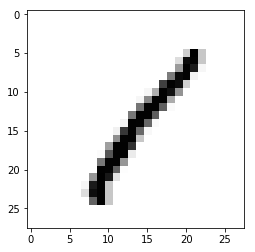

In [35]:
r = random.randint(0, mnist.test.num_examples-1)
print( "Label",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction:", sess.run(tf.argmax(hypothesis,1),feed_dict = {X:mnist.test.images[r:r+1]}))
                              
plt.imshow(
    mnist.test.images[r:r+1].reshape(28,28),
    cmap = "Greys",
    interpolation = 'nearest')
# 0과 예시 갯수-1 사이의 index를 뽑아낸다.
# scalar 값이 반환되기때문에 slicing할 때 :를 사용해야 ex) [r:r+1]로 해야 list값이 반환된다. 

In [36]:
#interpolation = nearest  그 중간값을 해라

In [ ]:
# index 생각해서 항상 짤라줘야한다.
    start = i
    end = batch_size + i
# 같은 데이터를 여러 번 돌려도 정확도가 올라갈 수 있다.